In [1]:
import heeps
from heeps.wavefront.get_array import show_wf
from heeps.util.coord import mas2rms
from heeps.util.img_processing import crop_img
import proper
import matplotlib.pyplot as plt
from copy import deepcopy
%matplotlib inline

## Initialize wavefront

In [2]:
# config params
conf = dict(
    f_pupil = '',
    diam_int = 0,
    spi_width = 0,
    seg_width = 0,
)
conf = heeps.config.read_config(verbose=False, **conf)
conf = heeps.config.update_config(saveconf=True, verbose=False, **conf)
wf = heeps.pupil.pupil(savefits=True, verbose=False, **conf)
# tiptilt in pix
tt_px = np.array([10, 0])
# tiptilt in mas
tt_mas = tt_px*conf['pscale']
# detector size (odd)
ndet = 41
# detector radius
rim = ndet/2

## Test tiptilt with diam_ext (PROPER wf beam diameter)

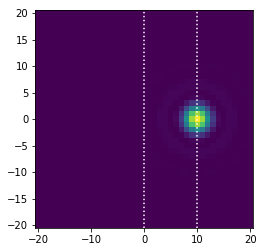

In [3]:
wf1 = deepcopy(wf)
proper.prop_zernikes(wf1, [2,3], mas2rms(tt_mas, conf['diam_ext']))
psf = crop_img(heeps.optics.detector(wf1, **conf), ndet)
plt.imshow(psf, origin='lower', extent=[-rim,rim,-rim,rim])
[plt.axvline(x, color='w', linestyle=':') for x in tt_px];

## Test tiptilt with diam_nominal (reflecting lambda/D value)

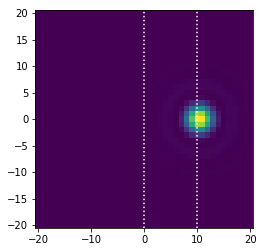

In [4]:
wf1 = deepcopy(wf)
proper.prop_zernikes(wf1, [2,3], mas2rms(tt_mas, conf['diam_nominal']))
psf = crop_img(heeps.optics.detector(wf1, **conf), ndet)
plt.imshow(psf, origin='lower', extent=[-rim,rim,-rim,rim])
[plt.axvline(x, color='w', linestyle=':') for x in tt_px];

## Test tiptilt with pupil_img_size

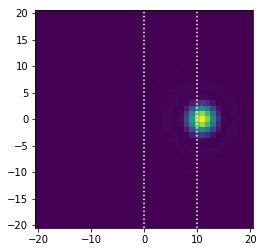

In [5]:
wf1 = deepcopy(wf)
proper.prop_zernikes(wf1, [2,3], mas2rms(tt_mas, conf['pupil_img_size']))
psf = crop_img(heeps.optics.detector(wf1, **conf), ndet)
plt.imshow(psf, origin='lower', extent=[-rim,rim,-rim,rim])
[plt.axvline(x, color='w', linestyle=':') for x in tt_px];